# My Python Data Portfolio 3

### Aim
The aims of this section are to
1. Explore the cleaned data.
2. Scale the data if required, selecting an appropriate method of scaling.
3. Rank the columns by variability of data.
4. Find out which measurements have the most/least variability.

#### About the data

My data set is in the form of comma separated values (csv).<br>
This is the third part of my data analysis portfolio 1.
If you are interested in part 1 see here, or here for part 2.

#### Importing and checking the data

After the data is imported, it can be checked to see that there are ten measurement columns and ten columns that show the dates the measurements were taken.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

measurements=pd.read_csv('measurements_and_active.csv')
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9813 non-null   int64  
 1   Start Date           9813 non-null   object 
 2   End Date             9813 non-null   object 
 3   Measurements 1       9813 non-null   float64
 4   Measurements 2       9813 non-null   float64
 5   Measurements 3       9813 non-null   float64
 6   Measurements 4       9813 non-null   float64
 7   Measurements 5       9813 non-null   float64
 8   Measurements 6       9813 non-null   float64
 9   Measurements 7       9813 non-null   float64
 10  Measurements 8       9813 non-null   float64
 11  Measurements 9       9813 non-null   float64
 12  Measurements 10      9813 non-null   float64
 13  Active               9813 non-null   bool   
 14  Measurement Date 1   9813 non-null   object 
 15  Measurement Date 2   9813 non-null   o

In order to make the data easier to work with a list is created.<br>
The list contains the names of all the measurement columns.<br>

In [22]:
measurement_columns=['Measurements {}'.format(i+1) for i in range(10)]
print(measurement_columns)

['Measurements 1', 'Measurements 2', 'Measurements 3', 'Measurements 4', 'Measurements 5', 'Measurements 6', 'Measurements 7', 'Measurements 8', 'Measurements 9', 'Measurements 10']


#### Average and scale
The first thing to be looked at will be the scales involved in the different columns of measurement.<br>
This is to see if the data can be compared across columns. <br>
By plotting every value in a column, it is obvious that there are very different ranges of values involved.<br>
Measurement 2 seems to have a much higher average and range of values than any of the other columns.<br>
Columns 1, 3, 4, 6, 8 and 10 have very small values in comparison to column 2.<br>
This means that the values will have to be scaled for better comparison.

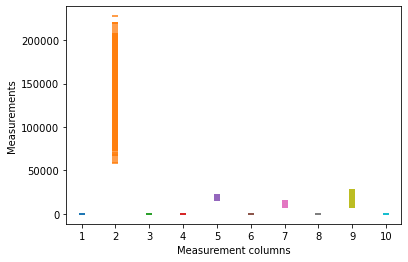

In [23]:
for i in range(10):
    plt.scatter([i+1]*measurements.shape[0], y=measurements['Measurements {}'.format(i+1)], marker="_")
plt.xlabel('Measurement columns')
plt.ylabel('Measurements')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.show()

#### Looking at each column separately
Before scaling the measurements, each column can be graphed by itself.<br>
This will give a closer view of each columns data, as well as something that the scaled data can be compared to.<br>
When the data has been scaled, the resulting graph should look similar to a merging of the ten graphs shown.

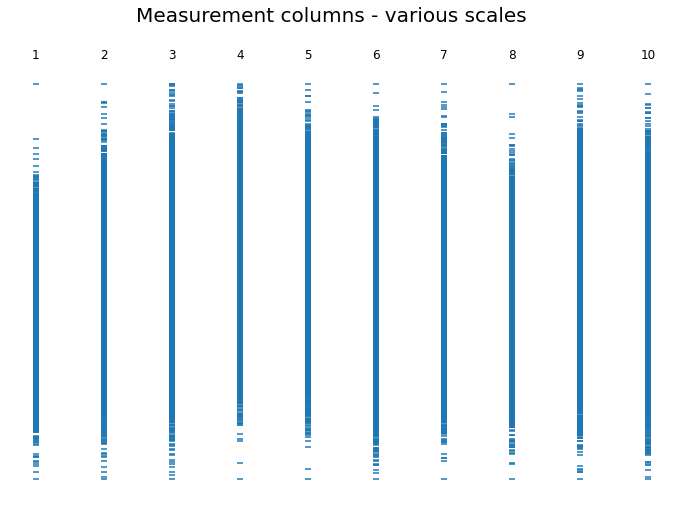

In [24]:
fig, axs = plt.subplots(1,10, figsize=(12,8))
fig.suptitle('Measurement columns - various scales', fontsize=20)
for i in range(10):
    axs[i].scatter([i+1]*measurements.shape[0],y=measurements['Measurements {}'.format(i+1)], marker="_")
    axs[i].set_axis_off()
    axs[i].set_title(i+1)
plt.show()

#### Scaling the data
Given the large differences in values, the data is scaled using the following formula<br>
(x-min)/(max-min)<br>
where<br>
- 'x' is a value in the column
- 'min' is the minimum value in the column
- 'max' is the maximum value in the column

This scaling makes all values between 0 and 1.<br>

After the data is scaled it is stored in a data set called 'measurements_scaled'.<br>
The data can now be more easily compared. <br>

The combined graph here looks similar to when each individual column was displayed.<br>
This indicates that the scaling process has not greatly distorted the data.



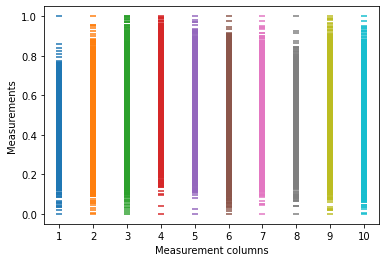

In [25]:
def scale(values):
    return (values-values.min())/(values.max()-values.min())

measurements_scaled = measurements[measurement_columns].apply(scale)

for i in range(10):
    plt.scatter([i+1]*measurements_scaled.shape[0], y=measurements_scaled['Measurements {}'.format(i+1)], marker="_")
plt.xlabel('Measurement columns')
plt.ylabel('Measurements')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.show()


#### Standard deviation of measurement columns

Now that the data has been scaled, the standard deviation of each column can be found and ranked.<br>

- Measurement 1 has the smallest standard deviation, suggesting it is the most consistent measurement.
- Measurement 3 has the largest standard deviation, suggesting it is the least consistent measurement.

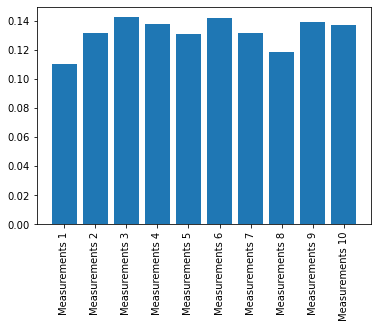

Measurements 1     0.110176
Measurements 8     0.118676
Measurements 5     0.130570
Measurements 7     0.131665
Measurements 2     0.131776
Measurements 10    0.136678
Measurements 4     0.137428
Measurements 9     0.138723
Measurements 6     0.142031
Measurements 3     0.142416
dtype: float64


In [26]:
standard_deviations=measurements_scaled[measurement_columns].std()

plt.bar(measurement_columns,standard_deviations)
plt.xticks(rotation=90)
plt.show()

print(standard_deviations.sort_values())

#### Conclusion

Looking back at the aims of this section the data has been
- Explored and scaled
- The variability of the data has been determined via standard deviation and ranked on a per column basis.
- The columns with the most and least standard deviation have been found.
